# Vulnerabilty (Impact functions)

The following illustrates the collection of physical impact functions, which relate housing damage (per building type classification) to hazard intensities (flood and TCs).

We show how to assign these impact functions to the Exposures described previously.

1. Impact Functions for Flood

    1.1 ("IVM")
    
    1.2 ("CIMA/JRC")


2. Impact Functions for TCs 

    2.1 ("CAPRA")
    
    2.2 ("HAZUS")

In [1]:
from climada.entity.exposures import Exposures
import numpy as np
import os

os.chdir('your-path-to/global-displacement-risk') # '/Users/evelynm/Documents/UNU_IDMC/global-displacement-risk'
import exposure
import vulnerability

### Assigning impact functions (Flood example) - "IVM"

While there are many different PAGER building types, we can simply define impact functions for all of these, and make a `CLIMADA` exposure from it (in which centroids are multiply defined).

In [4]:
# Get an Exposure
cntry_name = 'Somalia'
gdf_bem_subcomps = exposure.gdf_from_bem_subcomps(cntry_name, opt='full')
exp_bem_sub = Exposures(gdf_bem_subcomps.copy())
exp_bem_sub.gdf.rename({'valhum': 'value'}, axis=1, inplace=True)
exp_bem_sub.value_unit = 'Pop. count'
exp_bem_sub.gdf['longitude'] = exp_bem_sub.gdf.geometry.x
exp_bem_sub.gdf['latitude'] = exp_bem_sub.gdf.geometry.y

2024-04-19 19:20:06,654 - climada.util.coordinates - INFO - Reading /Users/evelynm/Documents/UNU_IDMC/data/exposure/grid_1x1_gid.tif


In [6]:
# get impf mapping for the building types
print(f'PAGER building types in {cntry_name}: {np.unique(gdf_bem_subcomps.se_seismo)}')

PAGER building types in Somalia: ['A' 'C' 'INF' 'RS2' 'RS4' 'UCB' 'UFB' 'W1' 'W2']


In [7]:
# see for which PAGER building types flood impact functions have been defined by one study ("IVM"):
vulnerability.DICT_PAGER_FLIMPF_IVM

{'A': 1,
 'ADB': 1,
 'ERTH': 1,
 'INF': 1,
 'M': 1,
 'RE': 1,
 'WWD': 1,
 'W1': 2,
 'W2': 2,
 'WLI': 2,
 'WS': 2,
 'BRK': 3,
 'CB': 3,
 'DS': 3,
 'STN': 3,
 'RS1': 2,
 'RS2': 3,
 'RS3': 3,
 'RS4': 3,
 'UCB': 4,
 'UFB': 4,
 'BTLR': 4,
 'C': 4,
 'C2': 4,
 'C3': 4,
 'MCF': 4,
 'RC': 4,
 'RM': 4,
 'S': 4}

In [9]:
# filter and apply impf id
gdf_bem_subcomps = gdf_bem_subcomps[gdf_bem_subcomps.valhum>0.001] # filter out rows with basically no population
gdf_bem_subcomps['impf_FL'] = gdf_bem_subcomps.apply(lambda row: vulnerability.DICT_PAGER_FLIMPF_IVM[row.se_seismo], axis=1)

For building type classes III and IV it is additionally important to distinguish between 1-storey and 2-or-more storey houses (impf ids 5 and 6). We make a simple majority-based vote here if the raster is rather 1 or more storeys:

In [10]:
# replace impf 3 --> 5 for 2-storeys and more
gdf_bem_subcomps.loc[((gdf_bem_subcomps.bd_3_floor+gdf_bem_subcomps.bd_2_floor)>0.5)
                     &(gdf_bem_subcomps.impf_FL==3), "impf_FL"] = 5

In [11]:
# replace impf 4 --> 6 for 2-storeys and more
gdf_bem_subcomps.loc[((gdf_bem_subcomps.bd_3_floor+gdf_bem_subcomps.bd_2_floor)>0.5)
                     &(gdf_bem_subcomps.impf_FL==4), "impf_FL"] = 6

In [12]:
# remove for now unnecessary cols and prepare gdf for CLIMADA Exposure
gdf_bem_subcomps.rename({'valhum' : 'value'}, axis=1)
for col in ['iso3', 'sector', 'valfis', 'se_seismo']:
    gdf_bem_subcomps.pop(col)

In [13]:
# Make CLIMADA Exposure with mutliply defined centroids
exp_bem_ivm = Exposures(gdf_bem_subcomps)
exp_bem_ivm.gdf.head()

,id_1x,cpx,valhum,bd_1_floor,bd_2_floor,bd_3_floor,geometry,impf_FL
6,194457751,3,0.003283,0.0,0.0,0.0,POINT (43.40417 0.66250),2
7,194457751,3,0.001404,0.0,0.0,0.0,POINT (43.40417 0.66250),2
12,194457751,3,0.002711,0.0,0.0,0.0,POINT (43.40417 0.66250),2
13,194457751,3,0.001159,0.0,0.0,0.0,POINT (43.40417 0.66250),2
18,194457751,3,0.281569,0.0,0.0,0.0,POINT (43.40417 0.66250),2


The specific flood impact function set that goes with these categories is the following

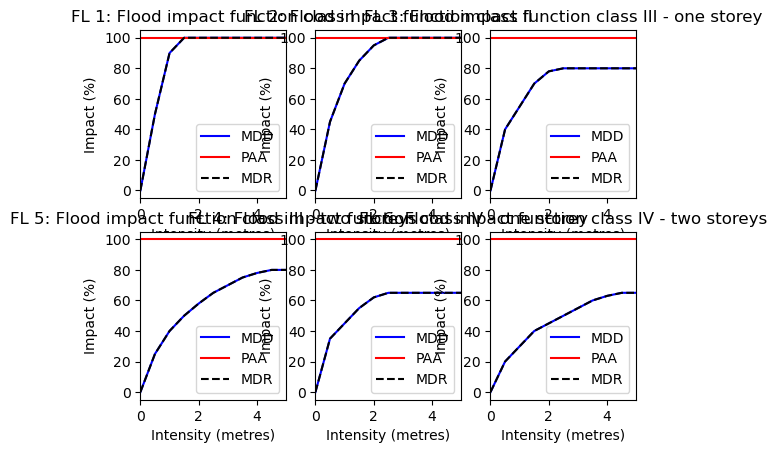

In [2]:
vulnerability.IMPF_SET_FL_IVM.plot();

### Assigning impact functions (Flood example) - "CIMA / JRC"

In [3]:
# see for which PAGER building types flood impact functions have been defined by another study ("CIMA"):
vulnerability.DICT_PAGER_FLIMPF_CIMA

{'A': 12,
 'A1': 12,
 'A2': 12,
 'A3': 12,
 'A4': 12,
 'C': 1,
 'C1': 1,
 'C1H': 1,
 'C1L': 1,
 'C1M': 1,
 'C2': 2,
 'C2L': 2,
 'C3': 3,
 'C3L': 3,
 'C3M': 3,
 'C4': 3,
 'CH': 1,
 'CL': 1,
 'CM': 1,
 'DS': 6,
 'DS1': 6,
 'DS2': 6,
 'DS3': 6,
 'DS4': 6,
 'INF': 14,
 'M': 12,
 'M2': 12,
 'MH': 14,
 'MS': 6,
 'PC': 4,
 'PC1': 4,
 'PC2': 4,
 'PC2L': 4,
 'RE': 12,
 'RM': 6,
 'RM1': 6,
 'RM1L': 6,
 'RM2': 7,
 'RM2H': 7,
 'RM2L': 7,
 'RM2M': 7,
 'RS': 6,
 'RS1': 6,
 'RS2': 6,
 'RS3': 6,
 'RS4': 6,
 'RS5': 6,
 'S': 1,
 'S1': 1,
 'S1H': 1,
 'S1L': 1,
 'S1M': 1,
 'S2': 2,
 'S2L': 2,
 'S3': 3,
 'S4': 3,
 'S4H': 3,
 'S4L': 3,
 'S4M': 3,
 'S5': 4,
 'S5L': 4,
 'UCB': 6,
 'UFB': 6,
 'UFB1': 6,
 'UFB2': 6,
 'UFB3': 6,
 'UFB4': 6,
 'UNK': 12,
 'W': 14,
 'W1': 14,
 'W2': 15,
 'W4': 15}

We repeat the same procedure with the CIMA impact functions for flood,...

In [ ]:
gdf_bem_subcomps = exposure.gdf_from_bem_subcomps(cntry_name, opt='full')
gdf_bem_subcomps = gdf_bem_subcomps[gdf_bem_subcomps.valhum>0.001] # filter out rows with basically no population
gdf_bem_subcomps['impf_FL'] = gdf_bem_subcomps.apply(lambda row: vulnerability.DICT_PAGER_FLIMPF_CIMA[row.se_seismo], axis=1)

In [ ]:
# remove for now unnecessary cols and prepare gdf for CLIMADA Exposure
gdf_bem_subcomps.rename({'valhum' : 'value'}, axis=1)
for col in ['iso3', 'sector', 'valfis', 'se_seismo', 'bd_1_floor','bd_2_floor','bd_3_floor']:
    gdf_bem_subcomps.pop(col)
# Make CLIMADA Exposure with mutliply defined centroids
exp_bem_cima = Exposures(gdf_bem_subcomps)
exp_bem_cima.gdf.head()

The specific flood impact function set that goes with these categories is the following

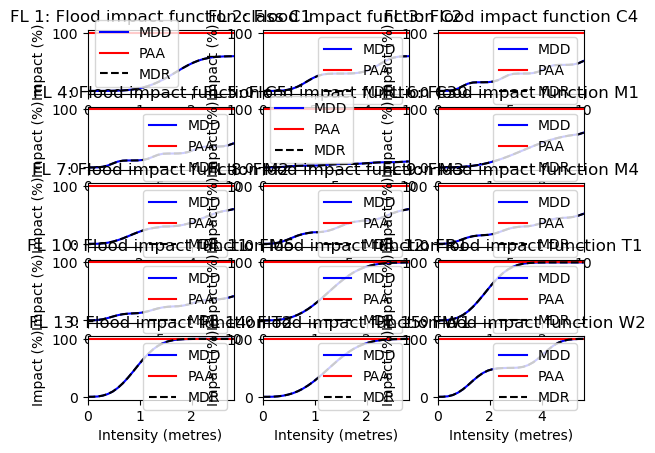

In [3]:
vulnerability.IMPF_SET_FL_CIMA.plot();